In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats import shapiro
from scipy.stats import norm

import warnings
warnings.filterwarnings('ignore')

In [2]:
def get_Xy(num=1, to_numpy=False):
    X = pd.read_csv(f'/content/drive/MyDrive/data/task1_{num}_learn_X.csv', header=None, sep=' ')
    y = pd.read_csv(f'/content/drive/MyDrive/data/task1_{num}_learn_y.csv', header=None, sep=' ')[0]
    if to_numpy:
        return X.to_numpy(), y.to_numpy()
    return X, y

def draw_stats(X, y):
    sns.heatmap(X.corr())
    # data = X.copy()
    # data['answers'] = y
    # sns.pairplot(data=data, hue='answers')

def NUM(y_true, y_pred):
    return np.sum([y_pred != y_true])

def ASY_1(y_true, y_pred):
    P = np.array([[-9, 9], [1, 0]])
    k = 0
    for i, j in zip(y_true, y_pred):
        k += P[int(i), int(j)]
    return k

def ASY_2(y_true, y_pred):
    P = np.array([[-1, 3], [2, -1]])
    k = 0
    for i, j in zip(y_true, y_pred):
        k += P[int(i), int(j)]
    return k

In [3]:
X_train, y_train = get_Xy(num=3)

In [ ]:
X_train.shape

(1000, 20)

In [ ]:
y_train.mean()

0.488

In [ ]:
X_train.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,33.848095,-36.098189,519.600837,47.931628,417.327335,-0.000314,185.304936,-101.494551,-104.713010,-84.000348,33.178870,331.740423,33.304562,-18.509180,142.397366,13.163702,239.916121,-39.602160,21.010790,-112.296101
std,4196.871272,7604.522871,7989.424136,2754.451564,8255.648360,0.010196,6002.024142,8510.878673,8019.326861,8951.760594,1968.260139,7882.318293,862.691982,4942.972414,6626.582325,3042.805233,9905.477046,1988.086262,2736.042151,5619.565972
min,-12459.566289,-25255.802033,-25453.617428,-8960.921253,-26282.310430,-0.029826,-18695.120434,-30053.100511,-25627.342172,-28921.633639,-6471.190567,-26264.686190,-3195.048846,-14466.137785,-21340.050336,-11291.722025,-31228.853090,-5928.613529,-10918.567394,-18885.297953
25%,-2782.243338,-4921.833477,-4813.472468,-1774.061275,-5354.505882,-0.007396,-3771.562975,-5596.326902,-5466.881470,-6032.072287,-1265.827347,-5301.149879,-528.495191,-3406.036041,-3999.972772,-2109.451545,-6355.298054,-1341.549395,-1775.972074,-3795.539227
50%,27.539293,19.960200,530.086424,208.608511,255.483394,-0.000232,44.364979,-152.260237,100.689512,-233.110572,20.890160,574.998837,41.922547,6.437550,-202.340687,-60.628399,304.346952,-47.116797,52.414461,-33.166136
75%,2844.934949,5040.601503,5708.064222,1868.062258,5877.573705,0.006431,4203.160531,5607.618792,5246.117849,5898.026618,1356.935135,5609.111915,604.282737,3358.852918,4393.188348,2097.349488,6933.685295,1278.046456,1832.094556,3548.561249
max,14476.536775,23601.976511,26726.699072,11321.759667,30259.787551,0.032662,21240.762674,28888.070725,33096.179080,31979.928222,5663.361704,23377.119442,3836.463419,16424.589859,22386.997633,9644.574478,29533.847058,6721.778228,9073.569469,17445.717916


<Axes: >

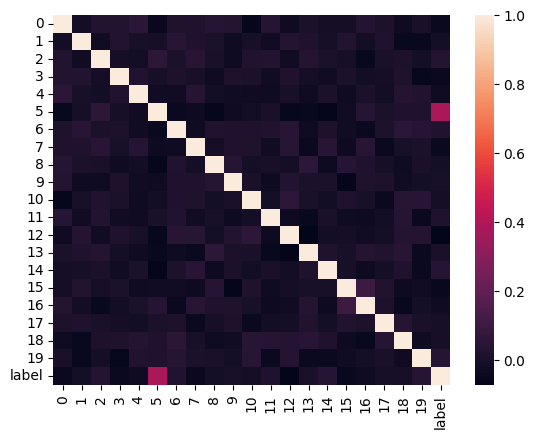

In [ ]:
Xy = X_train.copy()
Xy['label'] = y_train.values.astype('int32')
corr_matrix = Xy.corr()
sns.heatmap(corr_matrix)

In [ ]:
for col in X_train.columns:
    x = X_train[col].values
    shapiro_p = shapiro(x)[0]
    mu, std = norm.fit(x)
    print("p_val: %.3f, N(%.2f, %.2f)"%(shapiro_p, mu, std))

In [4]:
KLs = []
pos_ind = np.where(y_train == 1)[0]
neg_ind = np.where(y_train == 0)[0]

for col in X_train.columns:
    X_0 = X_train.loc[neg_ind, col].values
    X_1 = X_train.loc[pos_ind, col].values
    shapiro_0 = shapiro(X_0)[0]
    shapiro_1 = shapiro(X_1)[0]
    mu_0, std_0 = norm.fit(X_0)
    mu_1, std_1 = norm.fit(X_1)

    KL_div = np.log(std_1 / std_0) + (std_0**2 + (mu_0 - mu_1)**2)/(std_1**2) - 1
    print("KL_div: %.3f, Shapiro_ps: (%.3f, %.3f), N(%.3f, %3f), N(%.3f, %3f)"
          %(KL_div, shapiro_0, shapiro_1, mu_0, std_0, mu_1, std_1))
    KLs.append(KL_div)

KL_div: 0.027, Shapiro_ps: (0.997, 0.997), N(218.580, 4227.262465), N(-159.969, 4151.584634)
KL_div: 0.055, Shapiro_ps: (0.996, 0.998), N(74.454, 7779.146125), N(-152.088, 7407.126854)
KL_div: 0.052, Shapiro_ps: (0.997, 0.995), N(264.305, 8147.798106), N(787.452, 7802.471701)
KL_div: 0.016, Shapiro_ps: (0.997, 0.993), N(170.848, 2759.740760), N(-81.030, 2740.141185)
KL_div: -0.028, Shapiro_ps: (0.998, 0.995), N(630.347, 8116.433432), N(193.832, 8385.096244)
KL_div: 0.658, Shapiro_ps: (0.997, 0.998), N(-0.004, 0.009343), N(0.004, 0.009494)
KL_div: -0.078, Shapiro_ps: (0.998, 0.998), N(44.210, 5704.085658), N(333.339, 6290.222508)
KL_div: 0.007, Shapiro_ps: (0.998, 0.999), N(240.904, 8500.332426), N(-460.733, 8498.399619)
KL_div: -0.030, Shapiro_ps: (0.997, 0.991), N(25.181, 7884.901007), N(-240.995, 8147.676385)
KL_div: -0.021, Shapiro_ps: (0.997, 0.997), N(-57.096, 8850.412453), N(-112.227, 9047.718035)
KL_div: -0.015, Shapiro_ps: (0.998, 0.997), N(52.498, 1952.190802), N(12.910, 1982.

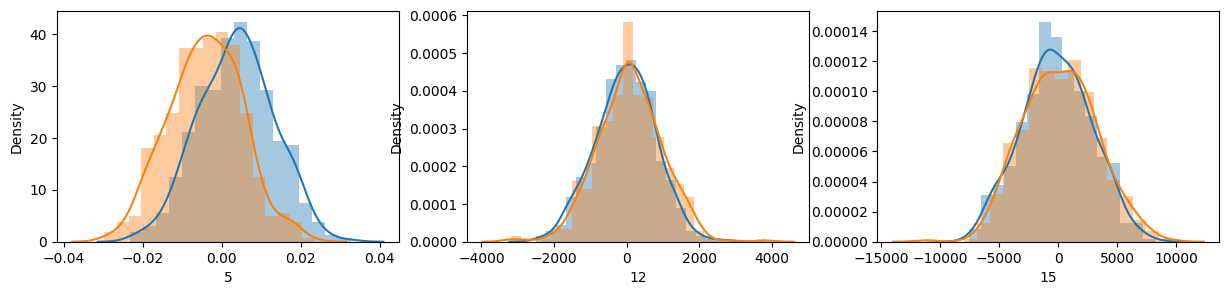

In [5]:
top_KL_cols = X_train.columns[np.argsort(np.array(KLs))][::-1][:3]

fig, axs = plt.subplots(1, 3, figsize=(15, 3))
plt.subplots_adjust(hspace=0.5)

def trim_axs(axs, N):
    axs = axs.flat
    for ax in axs[N:]:
        ax.remove()
    return axs[:N]

axs = trim_axs(axs, len(top_KL_cols))

for i, col in enumerate(X_train[top_KL_cols].columns):
    sns.distplot(X_train[top_KL_cols][col][y_train==1], ax=axs[i])
    sns.distplot(X_train[top_KL_cols][col][y_train==0], ax=axs[i])

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_predict, StratifiedKFold, cross_validate
from sklearn.metrics import confusion_matrix, make_scorer
from sklearn.naive_bayes import GaussianNB

In [7]:
import tqdm

In [8]:
skf = StratifiedKFold(n_splits=5)

In [9]:
def threshold_func(model, X, y):
    y_proba_pred = cross_val_predict(model, X, y, cv=skf, method='predict_proba')[:,1] # for class '1'
    thresholds = np.linspace(0, 1, 501)
    fig, axs = plt.subplots(ncols=3, figsize=(16, 4))
    nums, acy1s, acy2s = [], [], []
    for thres in tqdm.tqdm(thresholds):
        y_pred = np.array([int(x>thres) for x in y_proba_pred])
        conf_mat = confusion_matrix(y, y_pred)

        num = np.sum([y_pred!=y.values])
        nums.append(num)

        acy1 = np.sum(np.array([[-9, 9], [1, 0]]) * conf_mat)
        acy1s.append(acy1)

        acy2 = np.sum(np.array([[-1, 3], [2, -1]]) * conf_mat)
        acy2s.append(acy2)

    loc_min = np.argmin(nums)
    num_thres = thresholds[loc_min]
    axs[0].plot(thresholds, nums, c='C0', lw=1.5, label='NUM, p=%.2f'%num_thres)
    axs[0].scatter(thresholds[loc_min], nums[loc_min], c='C0', s=25)
    axs[0].legend();

    loc_min = np.argmin(acy1s)
    acy1_thres = thresholds[loc_min]
    axs[1].plot(thresholds, acy1s, c='C1', lw=1.5, label='ACY1, p=%.2f'%acy1_thres)
    axs[1].scatter(thresholds[loc_min], acy1s[loc_min], c='C1', s=25)
    axs[1].legend();

    loc_min = np.argmin(acy2s)
    acy2_thres = thresholds[loc_min]
    axs[2].plot(thresholds, acy2s, c='C2', lw=1.5, label='ACY2, p=%.2f'%acy2_thres)
    axs[2].scatter(thresholds[loc_min], acy2s[loc_min], c='C2', s=25)
    axs[2].legend();

    return num_thres, acy1_thres, acy2_thres

In [10]:
nb = GaussianNB()

res = []
for i in range(1, len(top_KL_cols) + 1):
    res_i = np.mean(cross_val_score(nb, X_train[top_KL_cols[:i]], y_train, scoring='roc_auc', cv=5))
    res.append(res_i)

best_k = np.argmax(res) + 1

In [11]:
X = X_train[top_KL_cols[:best_k]]
new_col = X_train[top_KL_cols[best_k:]].sum(axis=1)
X[best_k] = new_col

100%|██████████| 501/501 [00:06<00:00, 74.46it/s] 


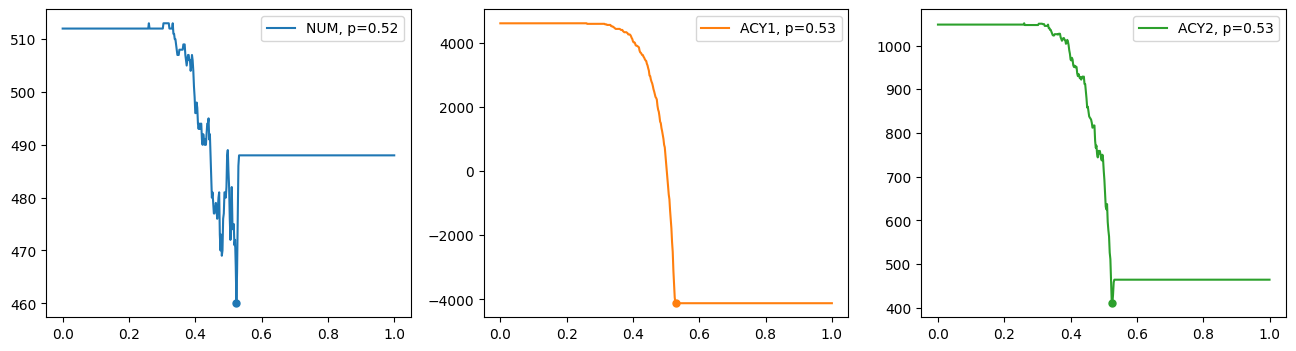

In [13]:
model = GaussianNB()
num_thres, acy1_thres, acy2_thres = threshold_func(model, X_train[top_KL_cols[:best_k]], y_train)

In [14]:
def thres_num(clf, X, y):
    thres = num_thres
    y_proba_pred = clf.predict_proba(X)[:,1]
    y_pred = np.array([int(x>thres) for x in y_proba_pred])
    return np.sum([y_pred!=y.values])

def thres_roc_auc(clf, X, y):
    y_proba_pred = clf.predict_proba(X)[:,1]
    return roc_auc_score(y, y_proba_pred)

def thres_acy1(clf, X, y):
    thres = acy1_thres
    y_proba_pred = clf.predict_proba(X)[:,1]
    y_pred = np.array([int(x>thres) for x in y_proba_pred])
    conf_mat = confusion_matrix(y, y_pred)
    acy1 = np.sum(np.array([[-9, 9], [1, 0]]) * conf_mat)
    return acy1

def thres_acy2(clf, X, y):
    thres = acy2_thres
    y_proba_pred = clf.predict_proba(X)[:,1]
    y_pred = np.array([int(x>thres) for x in y_proba_pred])
    conf_mat = confusion_matrix(y, y_pred)
    acy2 = np.sum(np.array([[-1, 3], [2, -1]]) * conf_mat)
    return acy2

In [18]:
model = GaussianNB()

metrics = {}
metrics["ROC_AUC"] = np.mean(cross_val_score(model, X_train[top_KL_cols[:best_k]], y_train, scoring=thres_roc_auc, cv=skf))
metrics["NUM"] = np.sum(cross_val_score(model, X_train[top_KL_cols[:best_k]], y_train, scoring=thres_num, cv=skf))
metrics["ASY1"] = np.sum(cross_val_score(model, X_train[top_KL_cols[:best_k]], y_train, scoring=thres_acy1, cv=skf))
metrics["ASY2"] = np.sum(cross_val_score(model, X_train[top_KL_cols[:best_k]], y_train, scoring=thres_acy2, cv=skf))
print(metrics)

{'ROC_AUC': 0.7188071685485324, 'NUM': 342, 'ASY1': -1832, 'ASY2': 172}


In [ ]:
model = LogisticRegression()

metrics = {}
metrics["ROC_AUC"] = np.mean(cross_val_score(model, X_train[top_KL_cols[:best_k]], y_train, scoring=thres_roc_auc, cv=skf))
metrics["NUM"] = np.sum(cross_val_score(model, X_train[top_KL_cols[:best_k]], y_train, scoring=thres_num, cv=skf))
metrics["ASY1"] = np.sum(cross_val_score(model, X_train[top_KL_cols[:best_k]], y_train, scoring=thres_acy1, cv=skf))
metrics["ASY2"] = np.sum(cross_val_score(model, X_train[top_KL_cols[:best_k]], y_train, scoring=thres_acy2, cv=skf))
print(metrics)

{'ROC_AUC': 0.7188071685485324, 'NUM': 343, 'ASY1': -4121, 'ASY2': 135}


In [ ]:
model = GaussianNB()
scoring = {
    "roc_auc": "roc_auc",
    "NUM": make_scorer(NUM),
    "ASY_1": make_scorer(ASY_1),
    "ASY_2": make_scorer(ASY_2)
}

info_train = cross_validate(model, X_train[top_KL_cols[:1]], y_train, cv=5, n_jobs=8,
                            scoring=scoring,
                            return_estimator=True)

score_train_valid = info_train["test_roc_auc"]
gaussian_nb = info_train['estimator'][np.argmax(score_train_valid)]

for metric in scoring:
    value = info_train["test_" + metric]
    print(f"Metric: {metric}: {value}")
    if metric == "roc_auc":
        print(f"Mean roc_auc: {np.mean(value)}")
    else:
        print(f"Sum {metric}: {np.sum(value)}")
    print()

Metric: roc_auc: [0.760004   0.68247299 0.75510204 0.6720048  0.72445201]
Mean roc_auc: 0.7188071685485324

Metric: NUM: [58 72 62 79 72]
Sum NUM: 343

Metric: ASY_1: [-418 -234 -363 -117 -311]
Sum ASY_1: -1443

Metric: ASY_2: [ 0 52 15 80 48]
Sum ASY_2: 195



In [ ]:
model = LogisticRegression()
scoring = {
    "roc_auc": "roc_auc",
    "NUM": make_scorer(NUM),
    "ASY_1": make_scorer(ASY_1),
    "ASY_2": make_scorer(ASY_2)
}

info_train = cross_validate(model, X_train[top_KL_cols[:1]], y_train, cv=5, n_jobs=8,
                            scoring=scoring,
                            return_estimator=True)

score_train_valid = info_train["test_roc_auc"]
logreg = info_train['estimator'][np.argmax(score_train_valid)]

for metric in scoring:
    value = info_train["test_" + metric]
    print(f"Metric: {metric}: {value}")
    if metric == "roc_auc":
        print(f"Mean roc_auc: {np.mean(value)}")
    else:
        print(f"Sum {metric}: {np.sum(value)}")
    print()

Metric: roc_auc: [0.760004   0.68247299 0.75510204 0.6720048  0.72445201]
Mean roc_auc: 0.7188071685485324

Metric: NUM: [98 98 98 97 96]
Sum NUM: 487

Metric: ASY_1: [-820 -820 -820 -830 -831]
Sum ASY_1: -4121

Metric: ASY_2: [94 94 94 91 88]
Sum ASY_2: 461



In [ ]:
X_test = pd.read_csv("/content/drive/MyDrive/data/task1_3_test_X.csv", delimiter=' ', header=None)
X_test.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,-81.642136,319.465594,-183.252500,44.310358,-80.750102,0.000256,-208.536777,403.335120,-345.582462,-234.942822,-17.341083,-14.943171,-19.702411,-47.071691,328.209764,20.171827,201.917902,103.012754,-4.642428,-47.091136
std,4216.985646,7875.503700,8191.876639,2892.776696,8341.494689,0.009703,6100.449788,8700.307625,7602.369744,8818.560470,2026.973314,7987.707968,851.753193,5139.813617,6852.391752,3017.328688,10098.053342,2058.554342,2743.628442,5542.002401
min,-13267.770378,-25248.519672,-31556.903611,-7939.788230,-39353.400016,-0.029111,-23082.727426,-27281.745895,-31189.566369,-30815.553504,-6315.911014,-25617.103026,-2583.229633,-15993.087616,-25526.836889,-9003.401883,-29953.030699,-7553.266083,-9143.159111,-17975.359833
25%,-2793.074131,-5260.939438,-5447.419977,-1912.391139,-5252.845834,-0.005857,-4262.172740,-5222.929751,-5247.072557,-6310.367027,-1427.247692,-5251.196704,-609.975339,-3763.503617,-4493.099361,-1983.858218,-6935.270500,-1214.824359,-1701.884433,-3829.700747
50%,-141.824550,218.669678,-68.528383,-71.774282,-215.122763,0.000654,-48.171649,-113.572288,-446.747076,-389.850241,48.674704,-188.576072,7.105053,-19.068378,351.294355,-93.866024,78.170209,73.356605,4.376834,68.529863
75%,2929.375371,5842.174615,5206.345536,2106.896497,5293.826028,0.006133,3642.822869,6472.208456,4594.200664,5479.762548,1271.473788,5281.497262,567.368365,3580.610274,4990.708691,2042.175985,7017.872620,1503.381784,1897.655146,3738.918280
max,11688.543730,26515.846801,34641.029823,10030.947302,29139.181892,0.035525,26404.078253,29057.247195,24472.281889,27256.270056,6001.508447,22666.830610,2872.508792,19075.533321,22471.450932,9578.417215,31196.161227,6154.430841,8139.059966,19775.831926


In [ ]:
def num_predict(clf, X):
    thres = num_thres
    y_proba_pred = clf.predict_proba(X)[:,1]
    y_pred = np.array([int(x > thres) for x in y_proba_pred])
    return y_pred

def roc_auc_predict(clf, X):
    y_pred = clf.predict(X)
    return y_pred

def acy1_predict(clf, X):
    thres = acy1_thres
    y_proba_pred = clf.predict_proba(X)[:,1]
    y_pred = np.array([int(x > thres) for x in y_proba_pred])
    return y_pred

def acy2_predict(clf, X):
    thres = acy2_thres
    y_proba_pred = clf.predict_proba(X)[:,1]
    y_pred = np.array([int(x > thres) for x in y_proba_pred])
    return y_pred

model = GaussianNB()
model = model.fit(X_train[top_KL_cols[:best_k]], y_train)
roc_auc = model.predict_proba(X_test[top_KL_cols[:best_k]])[:, 1]
num = num_predict(model, X_test[top_KL_cols[:best_k]])
acy1 = acy1_predict(model, X_test[top_KL_cols[:best_k]])
acy2 = acy2_predict(model, X_test[top_KL_cols[:best_k]])

out = pd.DataFrame(data = np.array([roc_auc, num, acy1, acy2]).T.astype('int32'), columns=["AUC", "NUM", "ASY1", "ASY2"])
out["AUC"] = roc_auc

out.to_csv("task1_3_ans.csv", index=False, sep=',')

In [ ]:
roc_auc = gaussian_nb.predict_proba(X_test[top_KL_cols[:1]])[:, 1]
num = gaussian_nb.predict(X_test[top_KL_cols[:1]])
acy1 = logreg.predict(X_test[top_KL_cols[:1]])
acy2 = gaussian_nb.predict(X_test[top_KL_cols[:1]])

out = pd.DataFrame(data = np.array([roc_auc, num, acy1, acy2]).T.astype('int32'), columns=["AUC", "NUM", "ASY1", "ASY2"])
out["AUC"] = gaussian_nb.predict_proba(X_test[top_KL_cols[:1]])[:, 1]

out.to_csv("task1_3_ans.csv", index=False, sep=',')